In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sys
top_path = '../'
if top_path not in sys.path:
    sys.path.append(top_path)
    
coffea_path = '/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/'
if coffea_path not in sys.path:
    sys.path.insert(0,coffea_path)

In [3]:
# from common_binning import JERC_Constants
# from JetEtaBins import JetEtaBins, PtBins

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib as mpl
from coffea import util
from make_comparison_plot import make_comparison_plot, make_double_ratio_plot
from coffea.lookup_tools import extractor
from JetEtaBins import JetEtaBins, PtBins


from helpers import read_data
out_txt_path = '../out_txt'

def read_data2(mean_name, samp, tag1):
    return read_data(mean_name, samp, tag1, out_txt_path)

from common_binning import JERC_Constants

In [5]:
from helpers import legend_labels
ttbarlab = legend_labels['ttbar']['lab']

In [6]:
from pltStyle import pltStyle
# from scipy.interpolate import CubicSpline
pltStyle(style='hep')
plt.rcParams['figure.dpi'] = 100

In [7]:
# outname = '../out/CoffeaJERCOutputs_L5_QCD-MG-Py.coffea'
# output = util.load(outname)


In [8]:
### Some recent file to get out the binning
# outname = '../out/CoffeaJERCOutputs_L5_DY-MG-Py.coffea'
outname = '../out/jetdrcut/CoffeaJERCOutputs_L5_DY-MG-Py.coffea'
output = util.load(outname)

f_xvals = np.linspace(0,5,5001)

ptbins = output[list(output.keys())[0]]['ptresponse_b'].axes['pt_gen'].edges
ptbins_c = output[list(output.keys())[0]]['ptresponse_b'].axes['pt_gen'].centers

# etabins = np.array(JERC_Constants.etaBinsEdges_Aut18_full())
etabins = np.array(JERC_Constants.etaBinsEdges_Win14_full())
# etabins = np.array(JERC_Constants.etaBinsEdges_CaloTowers_full())
# etabins = np.array([-5, -3, -2.5, -1.3, 0, 1.3, 2.5, 3, 5])
# etabins = np.array([-5.191, -3.489, -3.139, -2.853,   -2.5,
#                     -2.322,  -1.93, -1.653, -1.305, -0.783,      
#                     0,  0.783,  1.305,  1.653,   1.93,  2.322, 2.5, 
#                     2.853,  3.139,  3.489, 5.191])
    

etabins_abs = etabins[(len(etabins)-1)//2:]
etabins_c = (etabins_abs[:-1]+etabins_abs[1:])/2 #output['ptresponse'].axis('jeteta').centers()

In [9]:
import matplotlib as mpl

In [10]:
# (read_data2("Median", "b", '_L5_QCD-MG-Py')[0:,0])/read_data2("Median", "b", '_L5_QCD-MG-Her')[0:,0]

In [11]:
color_scheme = {key: cycler_vals
    for cycler_vals, key in zip(plt.rcParams['axes.prop_cycle'], ['g', 'q', 'c', 'b', 'QCD', 'DY', 'TTBAR', 'DY200'])}

leggend_dict = {'g': 'Gluons', 'q': 'Quarks', 'b': 'Bottom', 'c': 'Charm'}

In [12]:
# 1/closure

In [13]:
def read_data4plot(flav, tag, closure=1, path=out_txt_path):
    '''Read the Mean, MeanStd and RecoPt values of the data with tag `tag` and flavor `flav`.
    If closure==1, there is no clusure, otherwise it has to be of the same shape as the data read '''
    mean_name = "Median" #or 'Mean'
    mean_name_std = mean_name+'Std'
    median = read_data(mean_name, flav, tag, path)/closure #[2:]
    medianstd = read_data(mean_name_std, flav, tag, path) #[2:]
    reco = read_data("MeanRecoPt", flav, tag, path)
    return [median, medianstd, reco]
    

/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Fitting subsample:  b
Eta:  0
Saving plot for eta =  eta0p0to0p087
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_b_eta0p0to0p087.pdf / .png


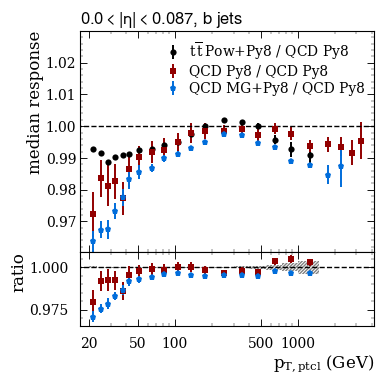

Fitting subsample:  b
Eta:  14
Saving plot for eta =  eta1p218to1p305
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_b_eta1p218to1p305.pdf / .png


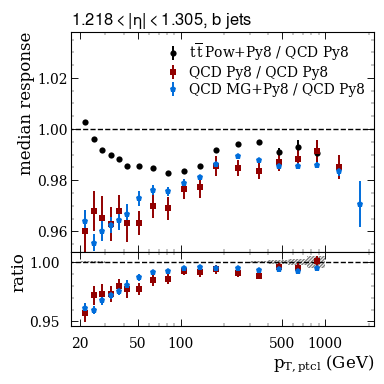

Fitting subsample:  b
Eta:  26
Saving plot for eta =  eta2p5to2p65
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_b_eta2p5to2p65.pdf / .png


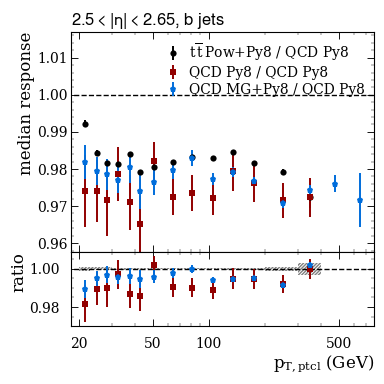

Fitting subsample:  b
Eta:  34
Saving plot for eta =  eta3p839to4p013
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_b_eta3p839to4p013.pdf / .png


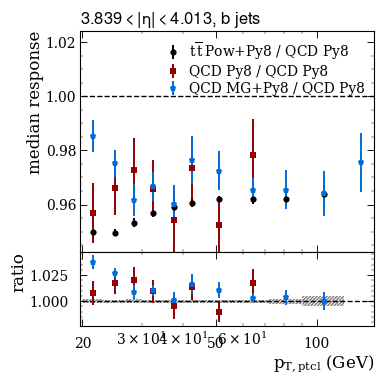

/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: divide by zero encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Fitting subsample:  c
Eta:  0
Saving plot for eta =  eta0p0to0p087
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_c_eta0p0to0p087.pdf / .png


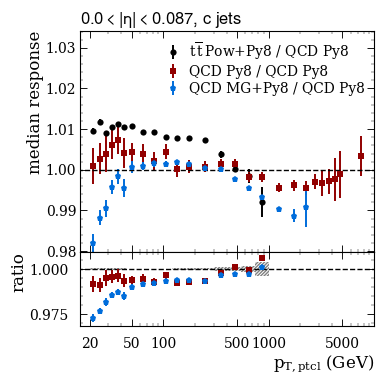

Fitting subsample:  c
Eta:  14
Saving plot for eta =  eta1p218to1p305
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_c_eta1p218to1p305.pdf / .png


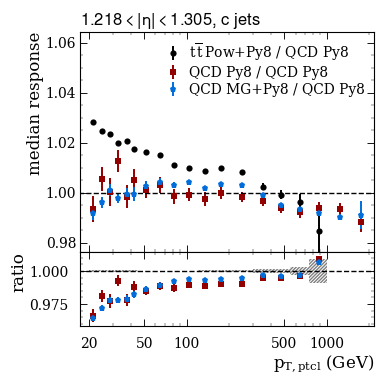

Fitting subsample:  c
Eta:  26
Saving plot for eta =  eta2p5to2p65
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_c_eta2p5to2p65.pdf / .png


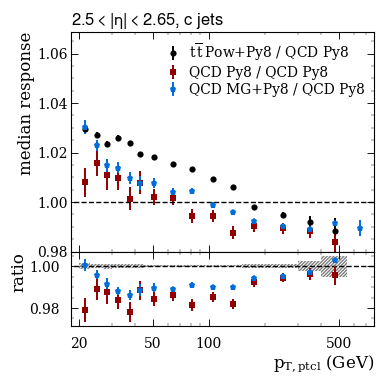

Fitting subsample:  c
Eta:  34
Saving plot for eta =  eta3p839to4p013
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_c_eta3p839to4p013.pdf / .png


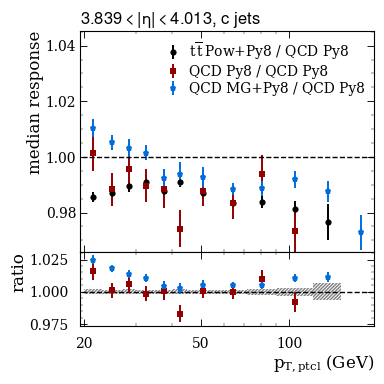

/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: divide by zero encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Fitting subsample:  d
Eta:  0
Saving plot for eta =  eta0p0to0p087
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_d_eta0p0to0p087.pdf / .png


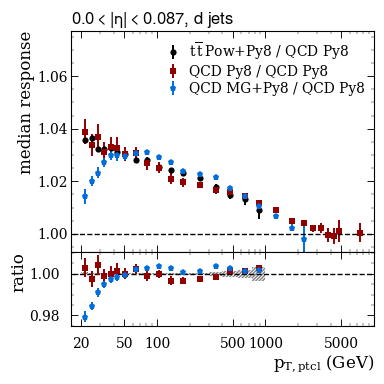

Fitting subsample:  d
Eta:  14
Saving plot for eta =  eta1p218to1p305
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_d_eta1p218to1p305.pdf / .png


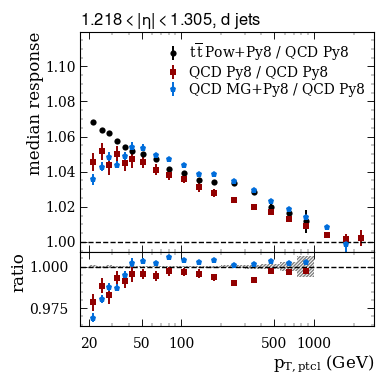

Fitting subsample:  d
Eta:  26
Saving plot for eta =  eta2p5to2p65
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_d_eta2p5to2p65.pdf / .png


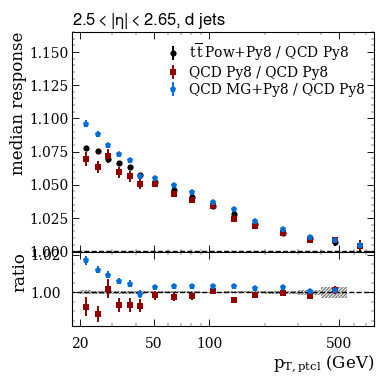

Fitting subsample:  d
Eta:  34
Saving plot for eta =  eta3p839to4p013
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_d_eta3p839to4p013.pdf / .png


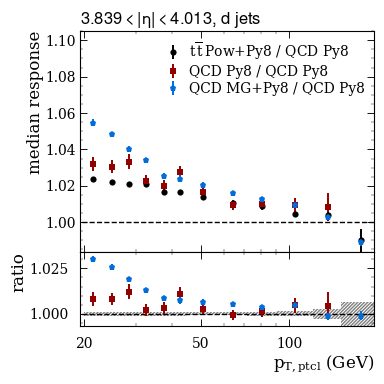

/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: divide by zero encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: divide by zero encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Fitting subsample:  u
Eta:  0
Saving plot for eta =  eta0p0to0p087
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_u_eta0p0to0p087.pdf / .png


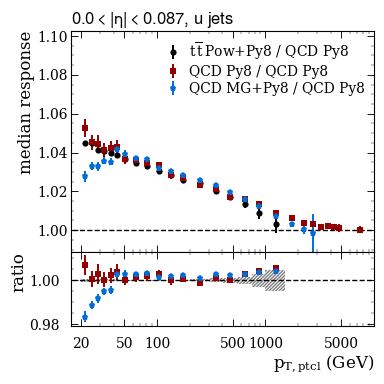

Fitting subsample:  u
Eta:  14
Saving plot for eta =  eta1p218to1p305
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_u_eta1p218to1p305.pdf / .png


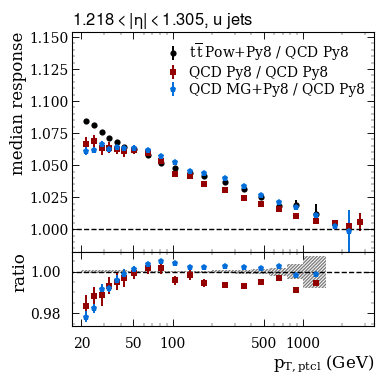

Fitting subsample:  u
Eta:  26
Saving plot for eta =  eta2p5to2p65
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_u_eta2p5to2p65.pdf / .png


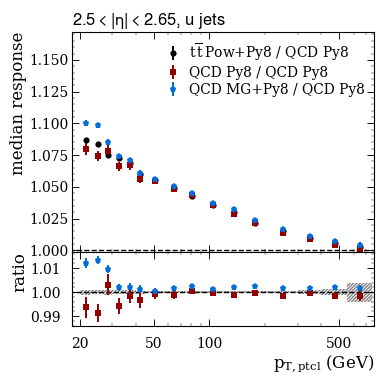

Fitting subsample:  u
Eta:  34
Saving plot for eta =  eta3p839to4p013
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_u_eta3p839to4p013.pdf / .png


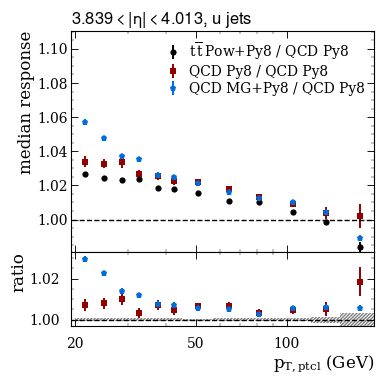

/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: divide by zero encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Fitting subsample:  s
Eta:  0
Saving plot for eta =  eta0p0to0p087
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_s_eta0p0to0p087.pdf / .png


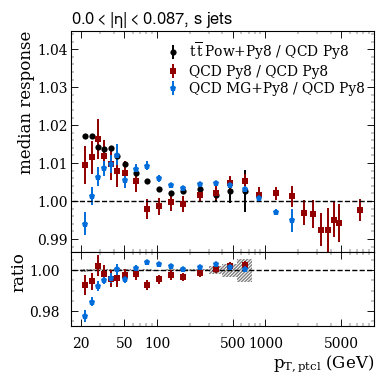

Fitting subsample:  s
Eta:  14
Saving plot for eta =  eta1p218to1p305
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_s_eta1p218to1p305.pdf / .png


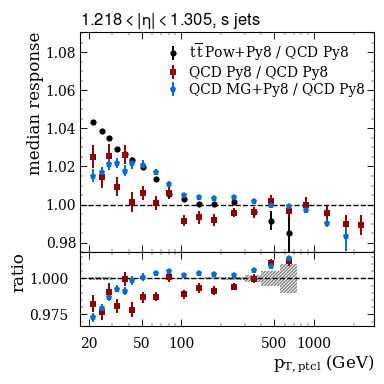

Fitting subsample:  s
Eta:  26
Saving plot for eta =  eta2p5to2p65
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_s_eta2p5to2p65.pdf / .png


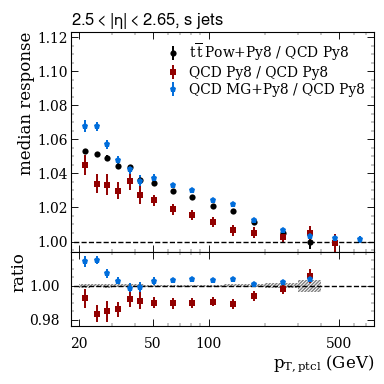

Fitting subsample:  s
Eta:  34
Saving plot for eta =  eta3p839to4p013
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_s_eta3p839to4p013.pdf / .png


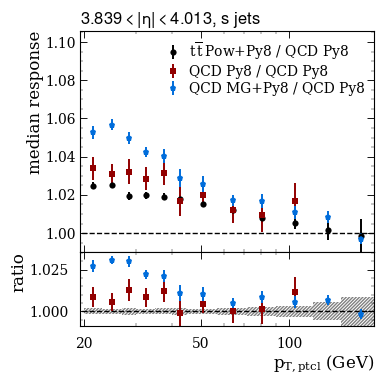

/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: divide by zero encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Fitting subsample:  g
Eta:  0
Saving plot for eta =  eta0p0to0p087
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_g_eta0p0to0p087.pdf / .png


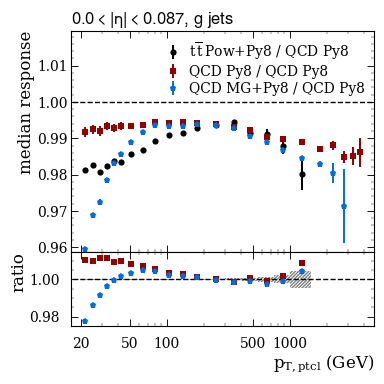

Fitting subsample:  g
Eta:  14
Saving plot for eta =  eta1p218to1p305
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_g_eta1p218to1p305.pdf / .png


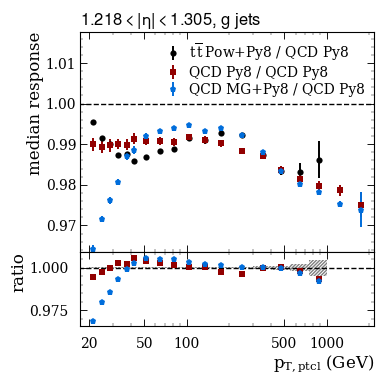

Fitting subsample:  g
Eta:  26
Saving plot for eta =  eta2p5to2p65
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_g_eta2p5to2p65.pdf / .png


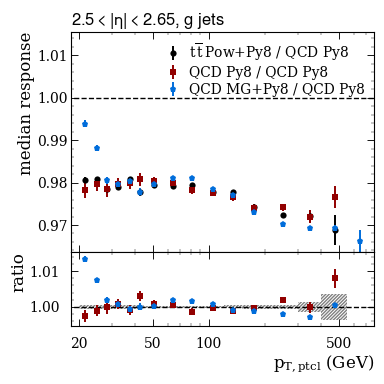

Fitting subsample:  g
Eta:  34
Saving plot for eta =  eta3p839to4p013
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_g_eta3p839to4p013.pdf / .png


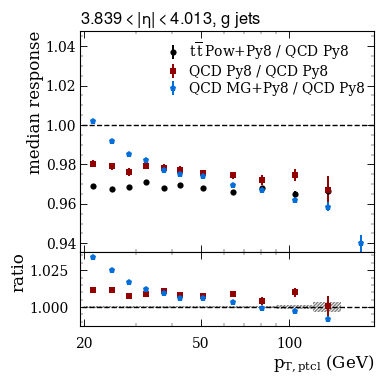

/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: divide by zero encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: divide by zero encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Fitting subsample:  ud
Eta:  0
Saving plot for eta =  eta0p0to0p087
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_ud_eta0p0to0p087.pdf / .png


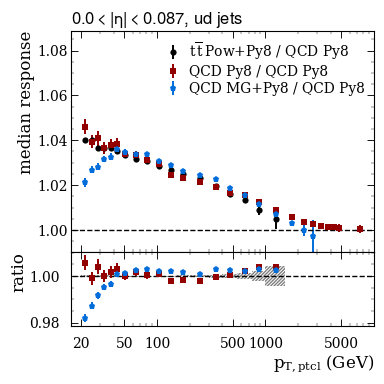

Fitting subsample:  ud
Eta:  14
Saving plot for eta =  eta1p218to1p305
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_ud_eta1p218to1p305.pdf / .png


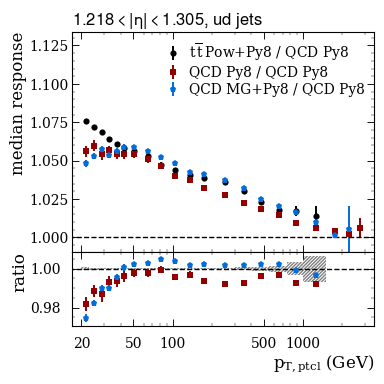

Fitting subsample:  ud
Eta:  26
Saving plot for eta =  eta2p5to2p65
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_ud_eta2p5to2p65.pdf / .png


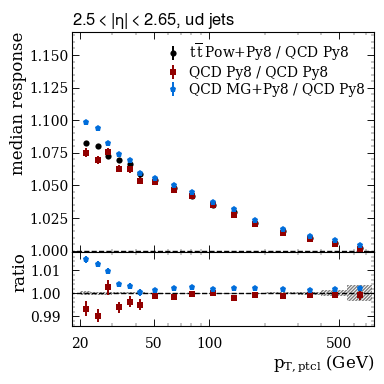

Fitting subsample:  ud
Eta:  34
Saving plot for eta =  eta3p839to4p013
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_ud_eta3p839to4p013.pdf / .png


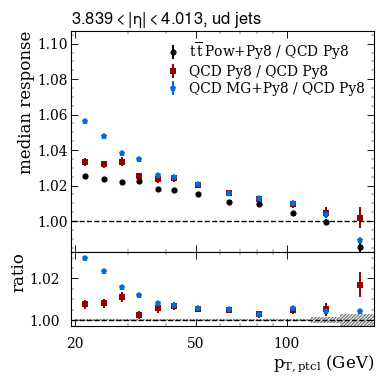

/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: divide by zero encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: divide by zero encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Fitting subsample:  q
Eta:  0
Saving plot for eta =  eta0p0to0p087
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_q_eta0p0to0p087.pdf / .png


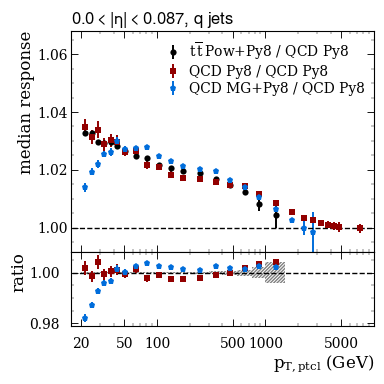

Fitting subsample:  q
Eta:  14
Saving plot for eta =  eta1p218to1p305
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_q_eta1p218to1p305.pdf / .png


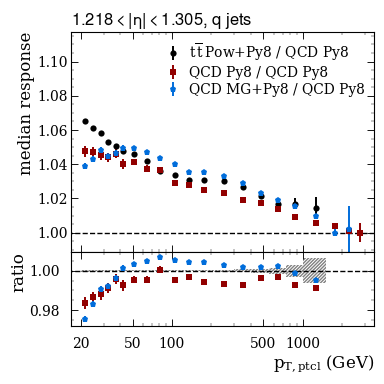

Fitting subsample:  q
Eta:  26
Saving plot for eta =  eta2p5to2p65
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_q_eta2p5to2p65.pdf / .png


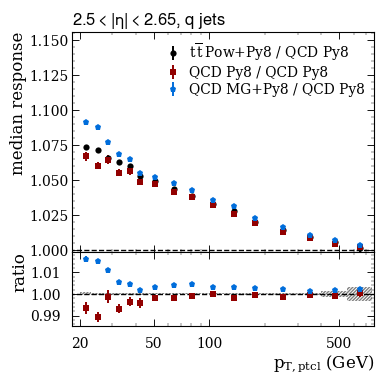

Fitting subsample:  q
Eta:  34
Saving plot for eta =  eta3p839to4p013
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_q_eta3p839to4p013.pdf / .png


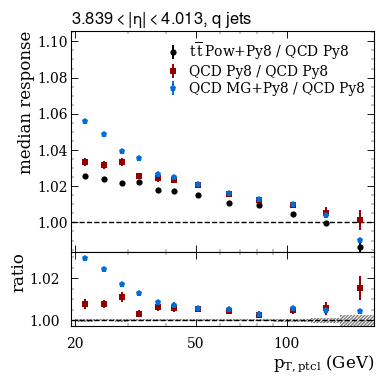

/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: divide by zero encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: divide by zero encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Fitting subsample:  all
Eta:  0
Saving plot for eta =  eta0p0to0p087
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_all_eta0p0to0p087.pdf / .png


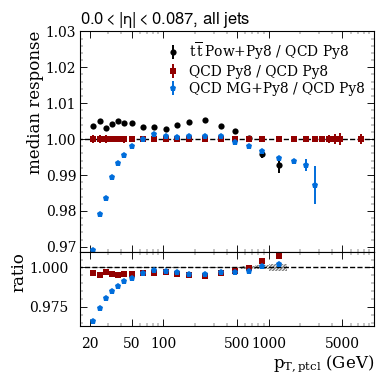

Fitting subsample:  all
Eta:  14
Saving plot for eta =  eta1p218to1p305
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_all_eta1p218to1p305.pdf / .png


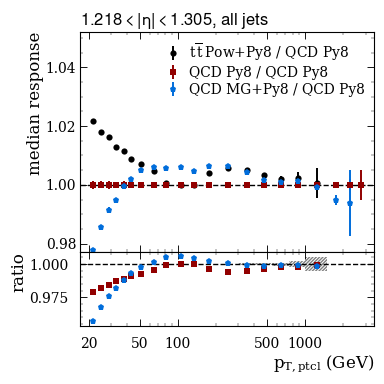

Fitting subsample:  all
Eta:  26
Saving plot for eta =  eta2p5to2p65
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_all_eta2p5to2p65.pdf / .png


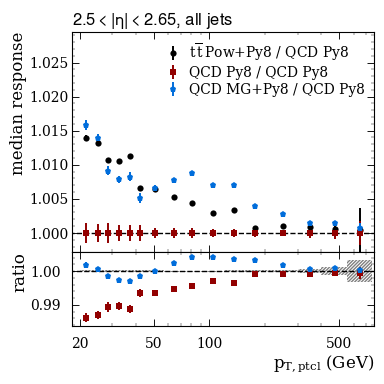

Fitting subsample:  all
Eta:  34
Saving plot for eta =  eta3p839to4p013
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_all_eta3p839to4p013.pdf / .png


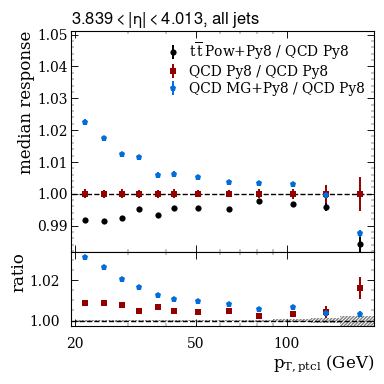

/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_1149/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Fitting subsample:  unmatched
Eta:  0
Saving plot for eta =  eta0p0to0p087
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_unmatched_eta0p0to0p087.pdf / .png


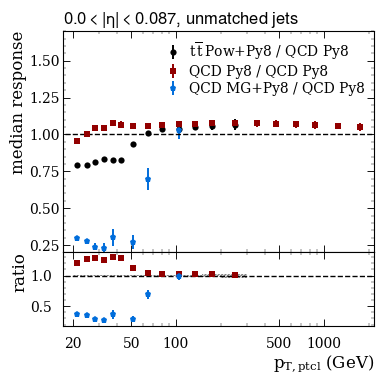

Fitting subsample:  unmatched
Eta:  14
Saving plot for eta =  eta1p218to1p305
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_unmatched_eta1p218to1p305.pdf / .png


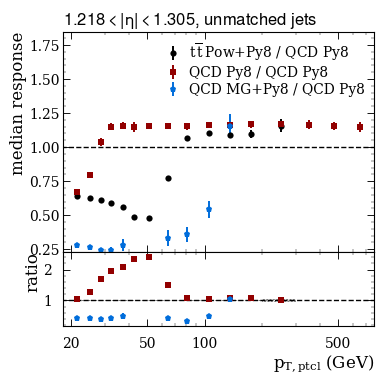

Fitting subsample:  unmatched
Eta:  26
Saving plot for eta =  eta2p5to2p65
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_unmatched_eta2p5to2p65.pdf / .png


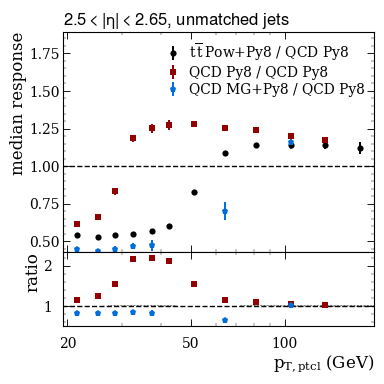

Fitting subsample:  unmatched
Eta:  34
Cannot determine ylimits
right lim = 1.0132590387579652
Saving plot for eta =  eta3p839to4p013
Saving plot with the name =  fig/med_resp_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8/med_resp_vs_pt_L5_ttbar_Pow_Py8__QCD_Py8-QCD_Py8__QCD_Py8-QCD_MG_Py8__QCD_Py8_unmatched_eta3p839to4p013.pdf / .png


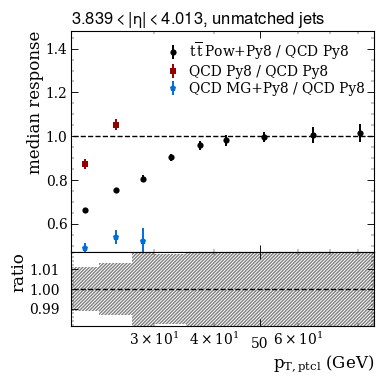

In [25]:
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar']
# flavors = ['all'] #, 'b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'unmatched']
flavors = ['b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'all', 'unmatched']
# flavors = ['all', 'b']

eta_binning  = "CaloTowers"  ### HCalPart, JERC, CoarseCalo, CaloTowers, onebin;
eta_binning_str = '_'+eta_binning if eta_binning != "HCalPart" else ''
etabins = JetEtaBins(eta_binning, absolute=True)
ptbins = PtBins("MC_truth")

tag1 = '_L5_QCD-Py'+eta_binning_str
tag2 = '_L5_QCD-MG-Py'+eta_binning_str
tag3 = '_L5_Pythia-TTBAR'+eta_binning_str

# tag1 = '_L5_DY-MG-Py'
# tag2 = '_L5_DY-MG-Her'

mean_name = "Median"
mean_name_std = mean_name+'Std'
closure_QCD = read_data2(mean_name, 'all', '_L5_QCD-Py'+eta_binning_str)
closure_TTBAR = read_data2(mean_name, 'all', '_L5_QCD-Py'+eta_binning_str)
# closure_Py2 = read_data2(mean_name, 'all', tag3)
# closure_Py3 = read_data2(mean_name, 'all', tag5)
# closure_Py = read_data(mean_name, 'all', tag3)


for flav in flavors:
    data = {
        # label_on_plot: data_list,
        f"{ttbarlab} Pow+Py8 / QCD Py8": np.array(read_data4plot(flav, tag3, closure_QCD)), #[:,:-1,:],
        f"QCD Py8 / QCD Py8": np.array(read_data4plot(flav, tag1, closure_QCD)), #[:,:-1,:],
        f"QCD MG+Py8 / QCD Py8": np.array(read_data4plot(flav, tag2, closure_QCD)), #[:,:-1,:],

    }

#     for k in range(len(etabins_abs)-1):
    for k in etabins.get_bin_idx([0, 1.3, 2.5, 4]):
#     for k in ptbins.get_bin_idx([20, 35, 150, 400]):
        print('Fitting subsample: ', flav)
        print('Eta: ', k)
        if not np.any(data[list(data.keys())[0]][2][:,k]>-0.1):
            continue
        
        make_comparison_plot(data, 
                          {},
                          etabins, ptbins,
                          binidx=k, flav=flav, ratio_name='ratio', inverse=False, plotvspt=True)
        
3;

In [ ]:
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar']
# flavors = ['all'] #, 'b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'unmatched']
flavors = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'unmatched']
# flavors = ['all', 'b']


tag1 = '_L5_Pythia-TTBAR'
tag2 = '_L5_Pythia-TTBAR_no_nonovelapping_cut'

# tag1 = '_L5_DY-MG-Py'
# tag2 = '_L5_DY-MG-Her'

mean_name = "Median"
mean_name_std = mean_name+'Std'
# closure_Py = read_data2(mean_name, 'all', tag1)
# closure_Py2 = read_data2(mean_name, 'all', tag3)
# closure_Py3 = read_data2(mean_name, 'all', tag5)
# closure_Py = read_data(mean_name, 'all', tag3)


for flav in flavors:
    data = {
        # label_on_plot: data_list,
        f"{ttbarlab} Pow+Py8": np.array(read_data4plot(flav, tag1)), #[:,:-1,:],
        f"{ttbarlab} Pow+Py8, no jet dr cut": np.array(read_data4plot(flav, tag2)), #[:,:-1,:],

    }

    for k in range(len(etabins_abs)-1):
        print('Fitting subsample: ', flav)
        print('Eta: ', k)
        if not np.any(data[list(data.keys())[0]][2][:,k]>-0.1):
            continue
        
        make_comparison_plot(data, 
                          {},
                          etabins_abs, ptbins[:28],
                          etaidx=k, flav=flav, ratio_name='*/ \n Py8', inverse=False)
        
3;

Fitting subsample:  all
Eta:  0
Creating directory  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto
Saving plot for eta =  _eta00to1305
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_all_eta00to1305.pdf / .png


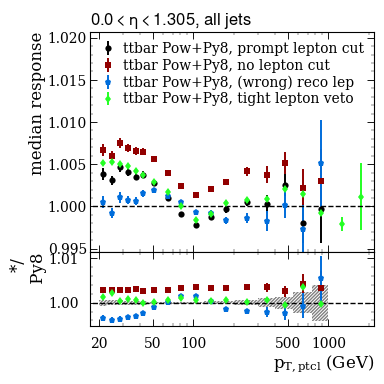

Fitting subsample:  all
Eta:  1
Saving plot for eta =  _eta1305to25
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_all_eta1305to25.pdf / .png


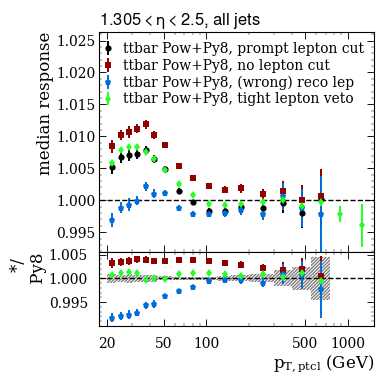

Fitting subsample:  all
Eta:  2
Saving plot for eta =  _eta25to3139
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_all_eta25to3139.pdf / .png


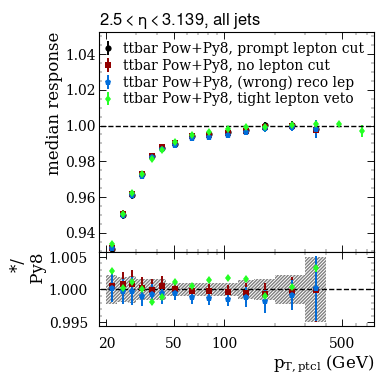

Fitting subsample:  all
Eta:  3
Saving plot for eta =  _eta3139to5191
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_all_eta3139to5191.pdf / .png


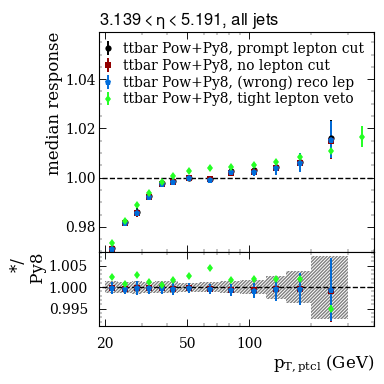

Fitting subsample:  b
Eta:  0
Saving plot for eta =  _eta00to1305
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_b_eta00to1305.pdf / .png


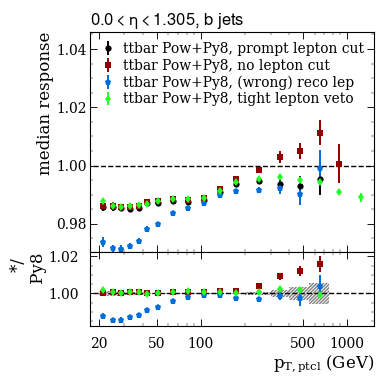

Fitting subsample:  b
Eta:  1
Saving plot for eta =  _eta1305to25
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_b_eta1305to25.pdf / .png


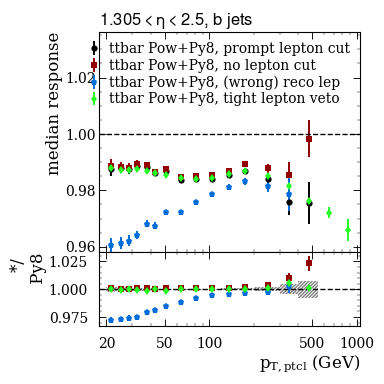

Fitting subsample:  b
Eta:  2
Saving plot for eta =  _eta25to3139
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_b_eta25to3139.pdf / .png


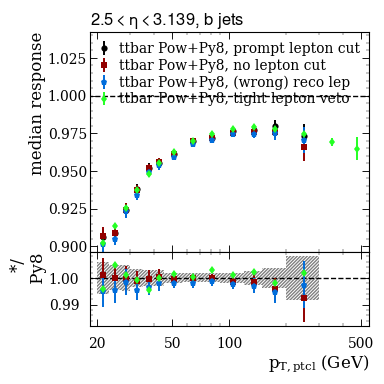

Fitting subsample:  b
Eta:  3
Saving plot for eta =  _eta3139to5191
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_b_eta3139to5191.pdf / .png


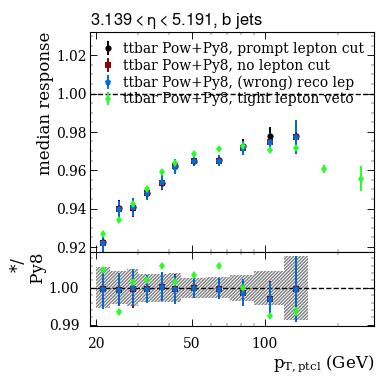

Fitting subsample:  c
Eta:  0
Saving plot for eta =  _eta00to1305
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_c_eta00to1305.pdf / .png


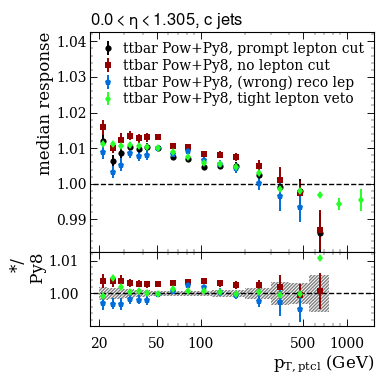

Fitting subsample:  c
Eta:  1
Saving plot for eta =  _eta1305to25
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_c_eta1305to25.pdf / .png


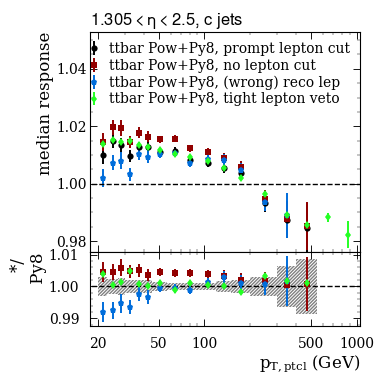

Fitting subsample:  c
Eta:  2
Saving plot for eta =  _eta25to3139
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_c_eta25to3139.pdf / .png


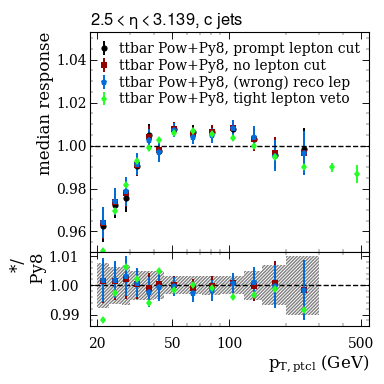

Fitting subsample:  c
Eta:  3
Saving plot for eta =  _eta3139to5191
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_c_eta3139to5191.pdf / .png


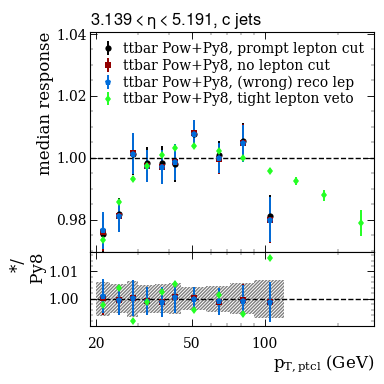

Fitting subsample:  d
Eta:  0
Saving plot for eta =  _eta00to1305
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_d_eta00to1305.pdf / .png


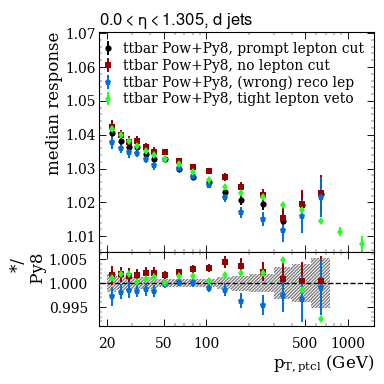

Fitting subsample:  d
Eta:  1
Saving plot for eta =  _eta1305to25
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_d_eta1305to25.pdf / .png


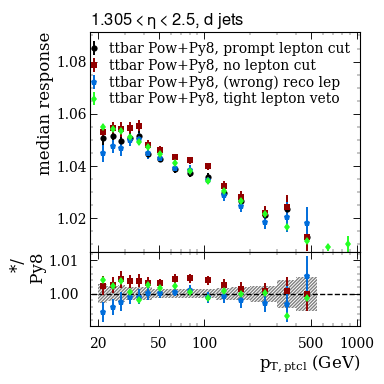

Fitting subsample:  d
Eta:  2
Saving plot for eta =  _eta25to3139
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_d_eta25to3139.pdf / .png


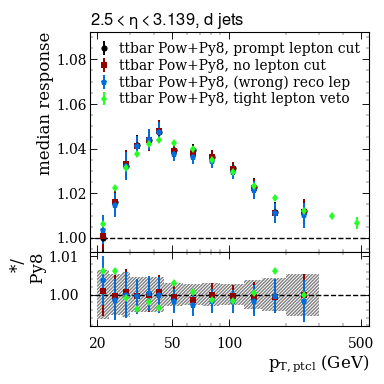

Fitting subsample:  d
Eta:  3
Saving plot for eta =  _eta3139to5191
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_d_eta3139to5191.pdf / .png


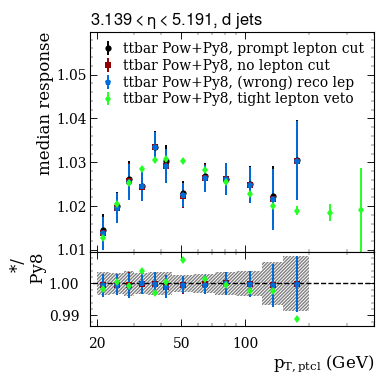

Fitting subsample:  u
Eta:  0
Saving plot for eta =  _eta00to1305
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_u_eta00to1305.pdf / .png


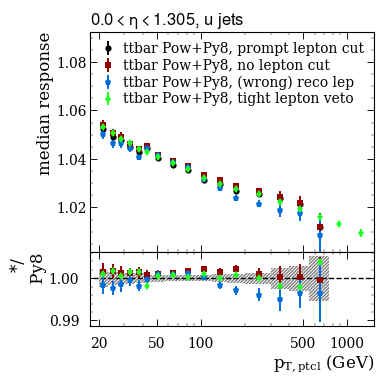

Fitting subsample:  u
Eta:  1
Saving plot for eta =  _eta1305to25
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_u_eta1305to25.pdf / .png


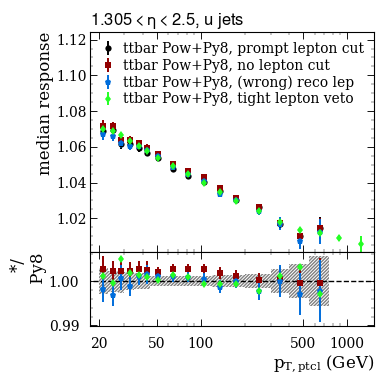

Fitting subsample:  u
Eta:  2
Saving plot for eta =  _eta25to3139
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_u_eta25to3139.pdf / .png


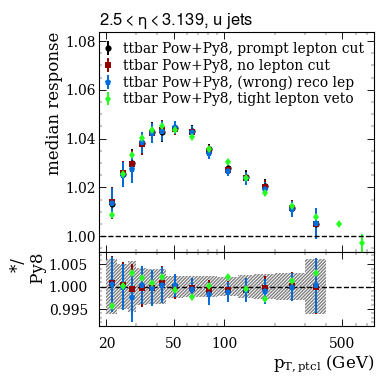

Fitting subsample:  u
Eta:  3
Saving plot for eta =  _eta3139to5191
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_u_eta3139to5191.pdf / .png


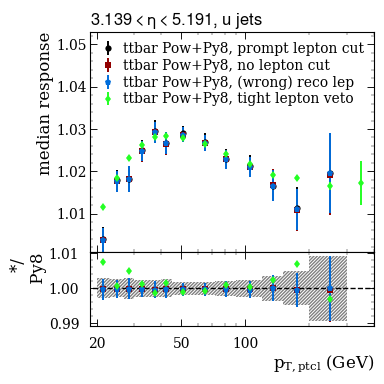

Fitting subsample:  s
Eta:  0
Saving plot for eta =  _eta00to1305
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_s_eta00to1305.pdf / .png


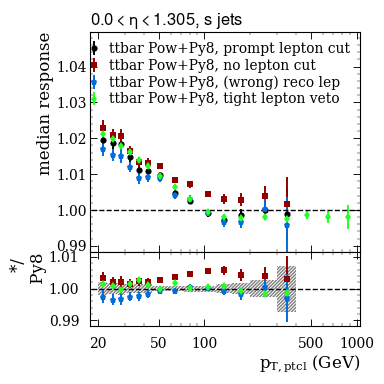

Fitting subsample:  s
Eta:  1
Saving plot for eta =  _eta1305to25
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_s_eta1305to25.pdf / .png


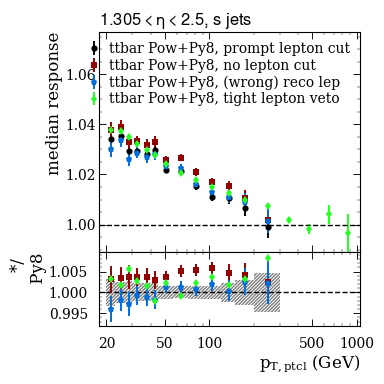

Fitting subsample:  s
Eta:  2
Saving plot for eta =  _eta25to3139
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_s_eta25to3139.pdf / .png


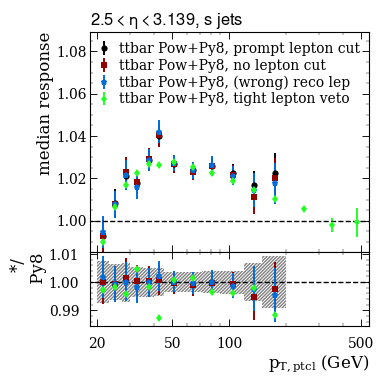

Fitting subsample:  s
Eta:  3
Saving plot for eta =  _eta3139to5191
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_s_eta3139to5191.pdf / .png


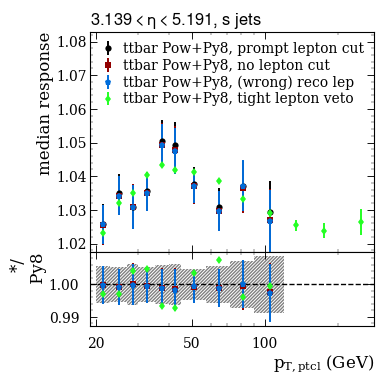

Fitting subsample:  g
Eta:  0
Saving plot for eta =  _eta00to1305
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_g_eta00to1305.pdf / .png


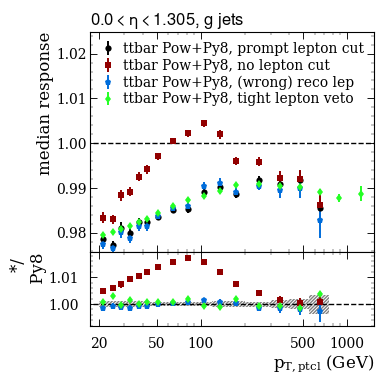

Fitting subsample:  g
Eta:  1
Saving plot for eta =  _eta1305to25
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_g_eta1305to25.pdf / .png


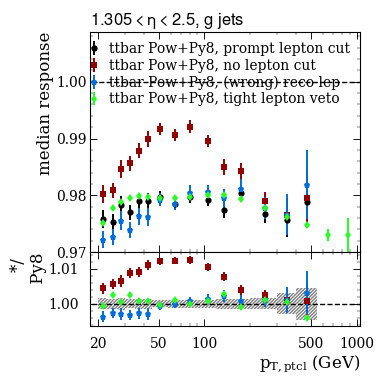

Fitting subsample:  g
Eta:  2
Saving plot for eta =  _eta25to3139
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_g_eta25to3139.pdf / .png


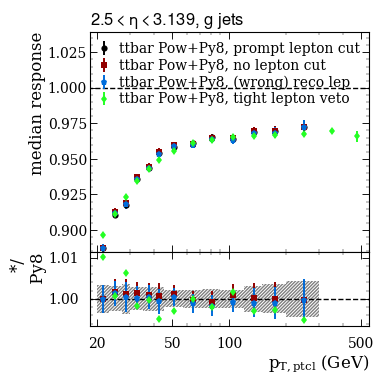

Fitting subsample:  g
Eta:  3
Saving plot for eta =  _eta3139to5191
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_g_eta3139to5191.pdf / .png


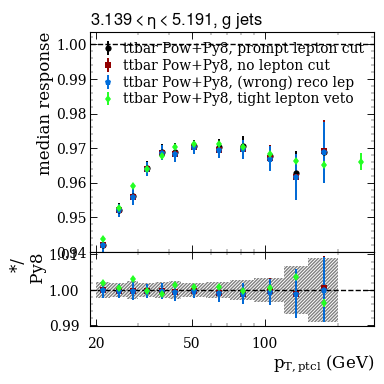

Fitting subsample:  ud
Eta:  0
Saving plot for eta =  _eta00to1305
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_ud_eta00to1305.pdf / .png


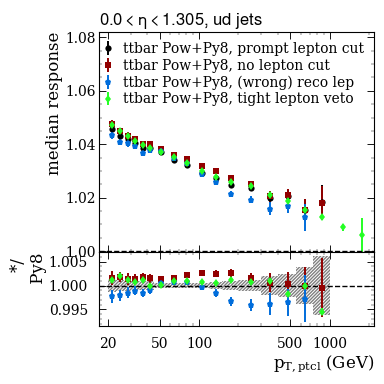

Fitting subsample:  ud
Eta:  1
Saving plot for eta =  _eta1305to25
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_ud_eta1305to25.pdf / .png


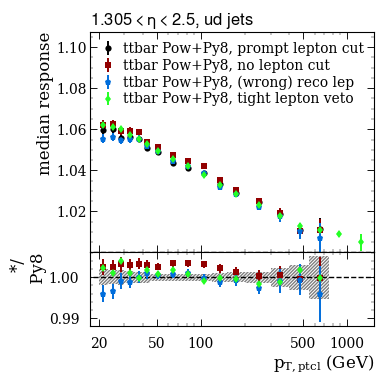

Fitting subsample:  ud
Eta:  2
Saving plot for eta =  _eta25to3139
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_ud_eta25to3139.pdf / .png


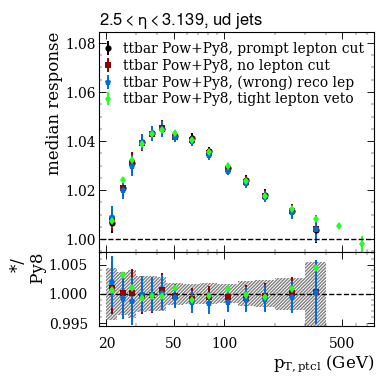

Fitting subsample:  ud
Eta:  3
Saving plot for eta =  _eta3139to5191
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_ud_eta3139to5191.pdf / .png


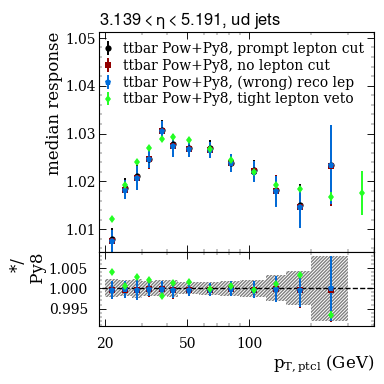

Fitting subsample:  q
Eta:  0
Saving plot for eta =  _eta00to1305
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_q_eta00to1305.pdf / .png


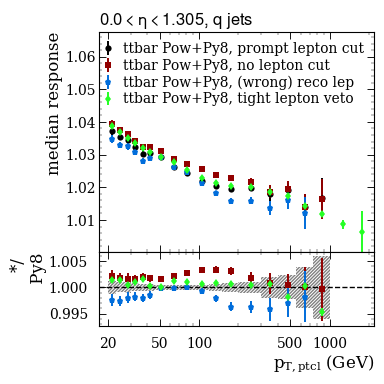

Fitting subsample:  q
Eta:  1
Saving plot for eta =  _eta1305to25
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_q_eta1305to25.pdf / .png


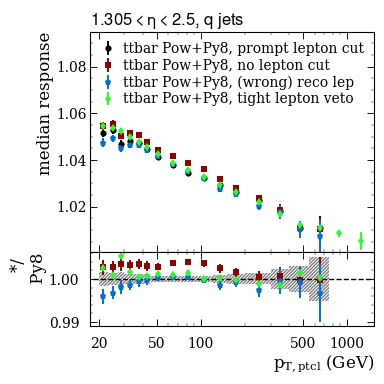

Fitting subsample:  q
Eta:  2
Saving plot for eta =  _eta25to3139
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_q_eta25to3139.pdf / .png


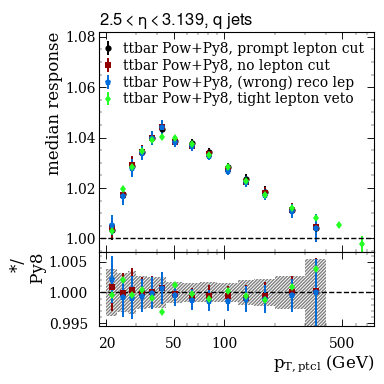

Fitting subsample:  q
Eta:  3
Saving plot for eta =  _eta3139to5191
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_q_eta3139to5191.pdf / .png


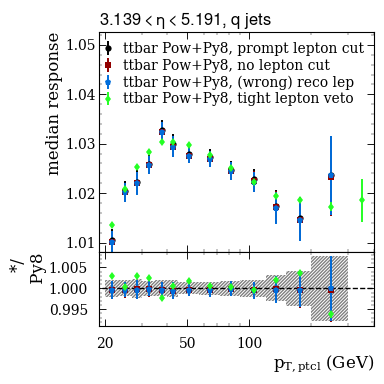

Fitting subsample:  unmatched
Eta:  0
Saving plot for eta =  _eta00to1305
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_unmatched_eta00to1305.pdf / .png


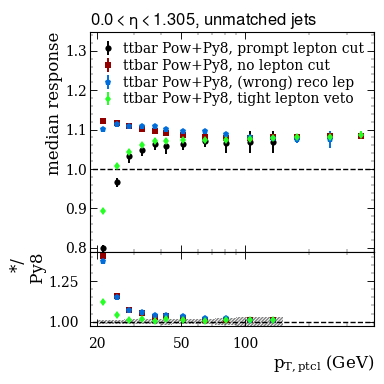

Fitting subsample:  unmatched
Eta:  1
Saving plot for eta =  _eta1305to25
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_unmatched_eta1305to25.pdf / .png


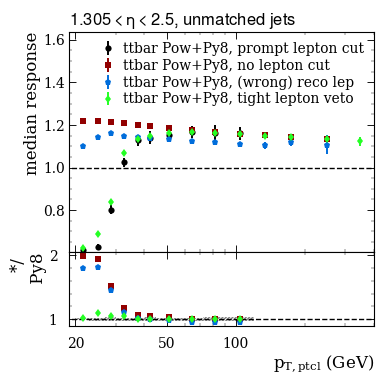

Fitting subsample:  unmatched
Eta:  2
Saving plot for eta =  _eta25to3139
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_unmatched_eta25to3139.pdf / .png


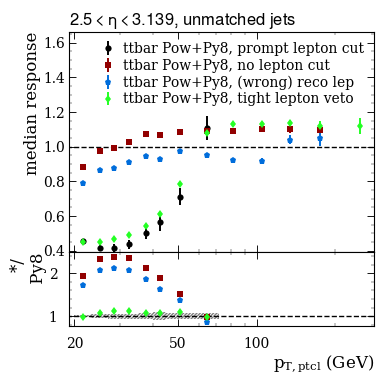

Fitting subsample:  unmatched
Eta:  3
Saving plot for eta =  _eta3139to5191
Saving plot with the name =  fig/corr_vs_pt_comparisons/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto/med_resp_vs_pt_L5_ttbar_Pow_Py8-prompt_lepton_cut-ttbar_Pow_Py8-no_lepton_cut-ttbar_Pow_Py8-(wrong)_reco_lep-ttbar_Pow_Py8-tight_lepton_veto_unmatched_eta3139to5191.pdf / .png


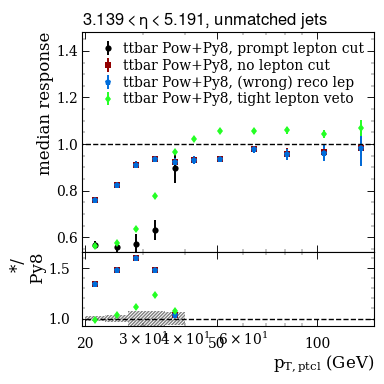

In [77]:
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar']
# flavors = ['all'] #, 'b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'unmatched']
flavors = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'unmatched']
# flavors = ['all', 'b']

# subsamples = ['unmatched']
# tag1 = '_L5_DY-MG-Her'
# tag2 = '_L5_DY-MG-Her_noleptoncut'
# tag3 = '_L5_DY-MG-Her_tight_jetId'
tag1 = '_L5_Pythia-TTBAR5files'
tag3 = '_L5_Pythia-TTBAR_tight_jetId'
tag2 = '_L5_Pythia-TTBAR_noleptoncut'
tag4 = '_L5_LHEflav1_TTBAR-JME'
tag5 = '_L5_Pythia-TTBARLHE_flav'
tag6 = '_L5_Pythia-TTBAR'
tag7 = '_L5_Pythia-TTBARLHE_flav_nolepcut'
tag8 = '_L5_Pythia-TTBARLHE_flav_finallepcut'
tag9 = '_L5_Pythia-TTBAR_finallepcut'
# tag3 = '_L5_DY-MG-Her_tight_jetId'
# tag4 = '_L5_QCD-MG-Her_alphacut_0p2'
# tag5 = '_L5_QCD-MG-Py_alphacut_0p2_gen15'
# tag6 = '_L5_QCD-MG-Her_alphacut_0p2_gen15'
# tag7 = '_L5_QCD-MG-Her_alphacut_0p2_promptlep_gen15'
# tag3 = '_L5_QCD-JME'
# tag1 = '_L5_Pythia-TTBAR'
# tag2 = '_L5_Herwig-TTBAR'
# tag1 = '_L5_DY-MG-Py'
# tag2 = '_L5_DY-MG-Her'
# tag3 = '_L5_DY-JME'


mean_name = "Median"
mean_name_std = mean_name+'Std'
# closure_Py = read_data2(mean_name, 'all', tag1)
# closure_Py2 = read_data2(mean_name, 'all', tag3)
# closure_Py3 = read_data2(mean_name, 'all', tag5)
# closure_Py = read_data(mean_name, 'all', tag3)


for flav in flavors:
    data = {
        # label_on_plot: data_list,
        "ttbar Pow+Py8, prompt lepton cut": np.array(read_data4plot(flav, tag1)), #[:,:-1,:],
#         "QCD MG+Her7": np.array(read_data4plot(flav, tag2))[:,:-1,:],
#         r"QCD MG+Py8, $\alpha<0.2$": read_data4plot(flav, tag3),
        r"ttbar Pow+Py8, no lepton cut": read_data4plot(flav, tag2), #, closure_Py3),
#         r"ttbar Pow+Py8, LHEflavor1, old": read_data4plot(flav, tag4), #, closure_Py3),
#         r"ttbar Pow+Py8, LHEflavor1, rep": read_data4plot(flav, tag5), #, closure_Py3),
#         r"ttbar Pow+Py8, LHEflavor1, no cut": read_data4plot(flav, tag7), #, closure_Py3),
#         r"ttbar Pow+Py8, no dressed leptons": read_data4plot(flav, tag6),
#         r"ttbar Pow+Py8, LHEflavor1 final lep": read_data4plot(flav, tag8),
        r"ttbar Pow+Py8, (wrong) reco lep": read_data4plot(flav, tag9),
#         r"ttbar Pow+Py8, no dressed leptons": read_data4plot(flav, tag5),
        r"ttbar Pow+Py8, tight lepton veto": read_data4plot(flav, tag6), #, closure_Py3),
#         r"QCD MG+Her7, alpha<0.2 ": read_data4plot(flav, tag7), #, closure_Py3),
#, $\alpha<0.4$, gen15
        #, $\alpha<0.2$, promtlep, gen15
        #         "TTBAR MG+Her7": [median_2, medianstd_2, reco_pt2],
#         "DY MGFxFx+Py8": [median_3, medianstd_2, reco_pt2],
#         "QCD MG+Her7": [median_2, medianstd_2, reco_pt2],

       }

    for k in range(len(etabins_abs)-1):
        print('Fitting subsample: ', flav)
        print('Eta: ', k)
        if not np.any(data[list(data.keys())[0]][2][:,k]>-0.1):
            continue
        
        make_comparison_plot(data, 
                          {},
                          etabins_abs, ptbins[:28],
                          etaidx=k, flav=flav, ratio_name='*/ \n Py8', inverse=False)
        
3;

In [21]:
corr_loc_Sum20_Py = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_fineeta.txt"]
corr_loc_Sum20_Her = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_fineeta.txt"]
unc = ["* * ../Summer19UL18_V5_MC/Summer19UL18_V5_MC_UncertaintySources_AK4PFchs.junc.txt"]

ext = extractor()
ext.add_weight_sets(corr_loc_Sum20_Py+corr_loc_Sum20_Her+unc)
ext.finalize()
evaluator2 = ext.make_evaluator()

In [22]:
# corr_loc_Sum20_Py = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py.txt"]
# corr_loc_Sum20_Her = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her.txt"]

corr_loc_Sum20_Py = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_pt30to500.txt"]
corr_loc_Sum20_Her = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_pt30to500.txt"]
# corr_loc_Sum20_Py = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_fineeta.txt"]
# corr_loc_Sum20_Her = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_fineeta.txt"]
# unc = ["* * ../Summer19UL18_V5_MC/Summer19UL18_V5_MC_UncertaintySources_AK4PFchs.junc.txt"]

ext = extractor()
ext.add_weight_sets(corr_loc_Sum20_Py+corr_loc_Sum20_Her)
ext.finalize()
evaluator = ext.make_evaluator()

/tmp/anpotreb/ipykernel_13155/3336818717.py:6: RuntimeWarning: invalid value encountered in divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_13155/3336818717.py:6: RuntimeWarning: invalid value encountered in divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Fitting subsample:  b
Eta:  0


IndexError: boolean index did not match indexed array along dimension 0; dimension is 26 but corresponding boolean dimension is 25

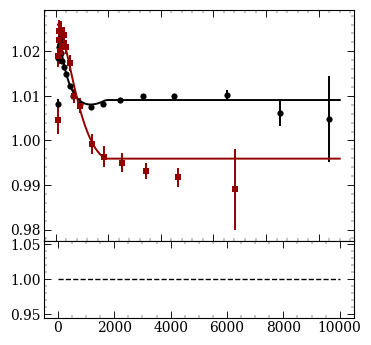

In [20]:
# load_fit_res=True
# flavoes = ['all', 'b', 'c', 'd', 'u', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar']
flavoes = ['b', 'c', 'd', 'u', 's', 'g', 'ud', 'q']

tag1 = '_L5_QCD-MG-Py'
tag2 = '_L5_QCD-MG-Her'
# tag1 = '_L5_Pythia-TTBAR'
# tag2 = '_L5_Herwig-TTBAR'

mean_name = "Median"
mean_name_std = mean_name+'Std'

closure_Py = read_data2(mean_name, 'all', tag1)



# ks = [k2, k4] #, k6, k8]
for flav in flavoes:
    data = {
        "QCD, MG+Py8": read_data4plot(flav, tag1, closure_Py), #[median_base, medianstd_base, reco_pt],
        "QCD, MG+Her7": read_data4plot(flav, tag2, closure_Py),
#         "MG+Py8": [median_3, medianstd_3, reco_pt3],
#         "divided": [median_3, medianstd_3, ptbins_c],
       }
    
    flav2 = 'a' if flav=='all' else flav
    evo_Her = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_pt30to500_{flav2}J']
    evo_Py = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_pt30to500_{flav2}J']
    
    functions = {
            "Summer20_Py":    [evo_Py, None],
            "Summer20_Her":   [evo_Her, None],
                       }

    for k in range(len(etabins_abs)-1):
        print('Fitting subsample: ', flav)
        print('Eta: ', k)
        median_base = data[list(data.keys())[0]]
        if not np.any(median_base[2][:,k]>-0.1):
            continue
        
        make_comparison_plot(data, 
                          functions,
                             etabins_abs, ptbins,
                          etaidx=k, flav=flav, ratio_name='*/ \n Py8')
        
3;

### Comparison with old corrections

In [14]:
Aut18_samples = ['all', 'b', 'c', 's', 'ud', 'g' ]
Sum16_samples = ['b', 'c', 's', 'ud', 'g' ]

In [15]:
list_corr_Sum16 = ["Summer16_07Aug2017_V15_Flavor_Pythia8_MC_"+samp+"_L5Flavor_AK4PFchs.txt" for samp in Sum16_samples]
list_corr_Sum16.append("Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs.txt")
list_corr_Sum16.append("Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L3Absolute_AK4PFchs.txt")
corr_loc_Sum16 = ["* * ../Summer16_07Aug2017_V15_Flavor_Pythia8_MC/"+corr for corr in list_corr_Sum16]
list_corr_Aut18 = ["Autumn18_V3_MC_Pythia8_"+samp+"_L2Relative_AK4PFchs.txt" for samp in Aut18_samples]
corr_loc_Aut18 = ["* * ../Autumn18_V3_MC_Pythia8/"+corr for corr in list_corr_Aut18]
corr_loc_Winter14 = ["* * ../Winter14_V8_MC_L5Flavor/Winter14_V8_MC_L5Flavor_AK5PFchs.txt"]
corr_loc_Sum20 = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py.txt"]
corr_loc_Sum20Her = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her.txt"]
corr_loc_Sum20_fineta = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_fineeta.txt"]
corr_loc_Sum20Her_fineta = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_fineeta.txt"]
corr_loc_Sum20_coarseCalo = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_CoarseCalo.txt"]
corr_loc_Sum20Her_coarseCalo = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_CoarseCalo.txt"]
corr_loc_Sum20_JERC = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py_JERC.txt"]
corr_loc_Sum20Her_JERC = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her_JERC.txt"]
corr_loc_Sum20standPy_JERC = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_standalonePyQCD_CaloTowers.txt"]

list_corr_Aut18 = ["Autumn18_V3_MC_Herwig7_"+samp+"_L2Relative_AK4PFchs.txt" for samp in Aut18_samples]
corr_loc_Aut18_Her = ["* * ../Autumn18_V3_MC_Pythia8/"+corr for corr in list_corr_Aut18]
# corr_loc_Sum20_Her = ["* * ../Summer20UL18_V2_MC/Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her-etaAut18.txt"]

In [16]:
# corr_loc_Sum16+corr_loc_Aut18+corr_loc_Winter14+corr_loc_Sum20+corr_loc_Aut18_Her+corr_loc_Sum20_Her

In [17]:
ext = extractor()
ext.add_weight_sets(corr_loc_Sum16+corr_loc_Aut18+corr_loc_Winter14+corr_loc_Sum20+corr_loc_Sum20Her
                    +corr_loc_Sum20_fineta+corr_loc_Sum20Her_fineta
                    +corr_loc_Sum20_coarseCalo+corr_loc_Sum20Her_coarseCalo
                    +corr_loc_Sum20_JERC+corr_loc_Sum20Her_JERC
                    +corr_loc_Aut18_Her+corr_loc_Sum20standPy_JERC) #+corr_loc_Sum20_Her)
# ext.add_weight_sets(corr_loc_Winter14)
ext.finalize()

# ext._names
evaluator = ext.make_evaluator()
# evo = evaluator['Autumn18_V3_MC_Pythia8_b_L2Relative_AK4PFchs']
# evaluator['Autumn18_V3_MC_Herwig7_b_L2Relative_AK4PFchs']
# evaluator['Autumn18_V3_MC_Herwig7_b_L2Relative_AK4PFchs']

In [18]:
# plt.rcParams['figure.subplot.top'] = 0.93
# plt.rcParams['figure.subplot.right'] = 0.99
# pltStyle(style='hep')
# plt.rcParams['figure.subplot.bottom'] = 0.37
# plt.rcParams['figure.subplot.left'] = 0.50
# plt.rcParams['figure.figsize'] = [10,20]
plt.rcParams['font.size'] = plt.rcParams['font.size']/0.98


In [25]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# from scipy.interpolate import CubicSpline
# from coffea import util
# from cycler import cycler
# import os
# import mplhep as hep
# from helpers import legend_labels
    
# from common_binning import JERC_Constants
# from JetEtaBins import JetEtaBins, PtBins

# def make_comparison_plot(data_dict,
#                               function_dict,
#                               etabins=JetEtaBins("HCalPart", absolute=True), #np.array(JERC_Constants.etaBinsEdges_CaloTowers_full()),
#                               ptbins=PtBins("MC_truth"), #np.array(JERC_Constants.ptBinsEdgesMCTruth()),
#                               binidx=0, flav='b',
#                               ratio_name='ratio',
#                               inverse=True, plotvspt=True):
#     ''' Make a plot of the jet energy response vs pt for the data points in the dictionary `data_dict`
#     Copare with with lines obtained from coffea evaluators in `function_dict`.
#     `function_dict` can be None than, no lines are shown.
#     A ratio plot is drawn vs the first entry in `data_dict`.
#     For the legends and figure name the flavor `flav` and eta bin values with the index `etaidx` are used.
#     '''
   
#     keys = [key for key in data_dict.keys()]
#     start = ptbins.get_bin_idx(20) if plotvspt else 0 #np.searchsorted(ptbins, 20, side='left')
#     end = ptbins.nbins if plotvspt else etabins.nbins

#     data_range = tuple([range(start,end),binidx]) if plotvspt else tuple([binidx, range(start,end)])
#     yvals = np.array([key[0][data_range] for key in data_dict.values()])
#     # end = np.min([len(yv) for yv in yvals])+start #cut, so that all yvals are the same
#     stds  = np.array([key[1][data_range] for key in data_dict.values()])
#     reco_pts  = np.array([key[2][data_range] if len(key[2].shape)==2 else key[2][data_range] for key in data_dict.values()])

# #     if not plotvspt:
# #         yvals = yvals.T
# #         stds = stds.T
# #         reco_pts = reco_pts.T

#     ### Replacing response values to corrections
#     use_recopt=inverse
#     if not plotvspt:
#         use_recopt=False
        
#     bins = etabins if plotvspt else ptbins

#     # yvals_base[(yvals_base==0) | (np.abs(yvals_base)==np.inf)] = np.nan
#     yvals[(yvals==0) | (np.abs(yvals)==np.inf)] = np.nan

#     fig = plt.figure()
#     gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0, height_ratios=[3, 1])
#     ax = fig.add_subplot(gs[0])
#     ax2 = fig.add_subplot(gs[1])
    
#     # Set up a new cycler to set up colors of the lines match to the colors of the points and all start with black
#     # , while for the ratio plot to start with the second marker and color
#     reset_colors = True ### if match the colors of the first points to the colors of the first lines
#     old_rc_cycler = plt.rcParams['axes.prop_cycle']
#     rc_bykey = old_rc_cycler.by_key()
#     for key in rc_bykey.keys():
#         if key=='color':
#             rc_bykey[key] = ['k']+rc_bykey[key]
#         else:
#             rc_bykey[key] = rc_bykey[key]+[rc_bykey[key][-1]]
#     new_cycler = cycler(**rc_bykey)
#     ax.set_prop_cycle(new_cycler)
    
#     for axis in [ax.xaxis, ax.yaxis, ax2.xaxis, ax2.yaxis]:
#         axis.set_minor_locator(mpl.ticker.AutoMinorLocator())

#     if plotvspt:
#         xvals = reco_pts if use_recopt else np.array([ptbins.centres[start:end]]*len(yvals))
#     else:
#         xvals = np.array([etabins.centres[start:end]]*len(yvals))
#     validx = (xvals>0)*(yvals>0)
#     # xvals_cont = {name: np.geomspace(np.min(xv[valx]), np.max(xv[valx]), 100)
#     #               for xv, valx, name in zip(xvals, validx, function_dict.keys())}
    
#     linspacefun = np.geomspace if plotvspt else np.linspace
#     if np.sum(validx) != 0:
#         xvals_cont = linspacefun(np.min(xvals[validx]), np.max(xvals[validx]), 100)
#     else:
#         xvals_cont = linspacefun(np.min(xvals), np.max(xvals), 100)
#                                     # for name in function_dict.keys()}
#     ### values for splines can only be in a valid range while for corrections evaluators they can go out of range
#     ### so one needs to define two xvals
#     validx_all = np.logical_not(np.any(np.logical_not(validx), axis=0))
#     if np.sum(validx_all) == 0:
#         validx_all = np.ones(validx_all.shape)==1
#     xspline = linspacefun(np.min(xvals[0,validx_all]),  np.max(xvals[0,validx_all]), 100)
#     xlog10_spline = np.log10(xspline)

#     if plotvspt:
#         wd = np.abs(ptbins.edges[start+1:end+1] - ptbins.edges[start:end]) #bin_widths
#     else:
#         wd = np.abs(etabins.edges[start+1:end+1] - etabins.edges[start:end]) #bin_widths

#     if inverse==True:
#         yvals = 1/yvals
#         ### Error propagation
#         stds = yvals**2*stds

#     if plotvspt:
#         eta_str = r'{:0.2f}$<|\eta|<${:0.2f}'.format(etabins.edges[binidx], etabins.edges[binidx+1])
#     else:
#         eta_str = 'to be implemented'
#     p1 = ax.errorbar(xvals[0], yvals[0], yerr=stds[0], #marker='o',
#     #                      markerfacecolor='none', markeredgewidth=1,
#                  linestyle="none", label=keys[0]) #+', '+eta_str)

#     # markers = ['v','^','d', 'p']
#     for xval, yval, name, std in zip(xvals[1:], yvals[1:], keys[1:], stds[1:]):
#         ax.errorbar(xval, yval, yerr=std, #marker=marker,
#                     linestyle="none", label=name)

#     if reset_colors:
#         ax.set_prop_cycle(new_cycler)

# #     assert False
#     yvals_cont = {}
#     yvals_spline = {}
#     for name in function_dict.keys():
#         correction_fnc, closure = function_dict[name]
#         xv_cont = xvals_cont
#         if closure is None or closure==1:
#             def closure(a,b):
#                 return np.ones_like(a*b)
#         #to ensure that the correction is applied from the right side of the bin border
#         binval = bins.edges[binidx]+0.001
#         vals_cont = (np.array([binval]), xv_cont) if plotvspt else (xv_cont, np.array([binval]))
#         vals_spline = (np.array([binval]), xspline) if plotvspt else (xspline, np.array([binval]))
#         yvals_cont[name] = correction_fnc(*vals_cont)/closure(*vals_cont)
#         yvals_spline[name] = correction_fnc(*vals_spline)/closure(*vals_spline)
        
#         eta_str = ''
#         if plotvspt:
#             corr_etabins = correction_fnc._bins['JetEta'] 
#             corr_bin_idx = np.searchsorted(corr_etabins, binidx, side='right')-1
#     #         assert False
#             if corr_bin_idx==len(corr_etabins):
#                 corr_bin_idx-=1
#             if 'Winter' in name:
#                 eta_str = ', \n'+r' {:0.2f}$<|\eta|<${:0.2f}'.format(corr_etabins[corr_bin_idx], corr_etabins[corr_bin_idx+1])
            
#         ax.plot(xv_cont, yvals_cont[name], label=name+eta_str, markersize=0) # +', '+eta_str, markersize=0)

#     ############################ Data ratio plot ######################################
    
#     ax2.hlines(1,-10, 10000, linestyles='--',color="black", 
#                linewidth=1,)
# #     else:
# #         ax2.hlines(1,-10, 10, linestyles='--',color="black",
# #             linewidth=1,)

    
#     data_model_ratio = yvals/yvals[0]
#     data_model_ratio_unc = stds / yvals[0]
    
#     non_nan_ratio = ~np.isnan(data_model_ratio_unc[0])

#     ax2.bar(
#         xvals[0, non_nan_ratio],
#         2 * data_model_ratio_unc[0][non_nan_ratio],
#         width=wd[non_nan_ratio],
#         bottom=1.0 - data_model_ratio_unc[0][non_nan_ratio],
#         fill=False,
#         linewidth=0,
#         edgecolor="gray",
#         hatch=10 * "/",
#     )

#     rc_bykey = new_cycler.by_key().copy()
#     for key in rc_bykey:
#         rc_bykey[key] = rc_bykey[key][1:]
#     shifted_cycler = cycler(**rc_bykey)
#     ax2.set_prop_cycle(shifted_cycler)

#     for xval, val, std in zip(xvals[1:], data_model_ratio[1:], data_model_ratio_unc[1:]): #, markers):
#         ax2.errorbar(
#             xval,
#             val, #[nonzero_model_yield],
#             yerr=std, #[nonzero_model_yield],
#             linestyle="none",
#             #fmt=marker,
#         )

#     ############################ Curves in the ratio plot (using spline approximation) #######
#     if reset_colors:
#         ax2.set_prop_cycle(new_cycler)
        
#     if np.sum(validx) != 0:
#         spline_func = CubicSpline(np.log10(xvals[0][validx[0]]), yvals[0][validx[0]], bc_type='natural')
#     else:
#         spline_func = CubicSpline([1,1], [-5,5], bc_type='natural') if plotvspt else CubicSpline([1,1], [20,100], bc_type='natural')
#     y_spline = spline_func(xlog10_spline)

#     for key in yvals_spline.keys():
#         ax2.plot(xspline, yvals_spline[key]/y_spline, markersize=0)

#     ax2.set_ylabel(ratio_name)
#     ax2.tick_params(axis="both", which="major", pad=8)
#     ax2.tick_params(direction="in", top=True, right=True, which="both")
#     fig.set_tight_layout(True)

#     ######################## Calculate resonable limits excluding the few points with insane errors
#     recalculate_limits=True
#     if recalculate_limits and np.sum(validx) != 0:
#         yerr_norm = np.concatenate([stds])
#         y_norm = np.concatenate([yvals])
#         norm_pos = (yerr_norm<0.04) &  (yerr_norm != np.inf) & (y_norm>-0.1)
#         left_lim = np.min((y_norm-yerr_norm)[norm_pos])
#         right_lim = np.max((yerr_norm+y_norm)[norm_pos])
#         lim_pad = (right_lim - left_lim)/1.5
#         ax.set_ylim(left_lim, right_lim+lim_pad)

#         yerr_norm = np.concatenate(data_model_ratio_unc)
#         y_norm = np.concatenate(data_model_ratio)
#         norm_pos = (yerr_norm<0.008) &  (yerr_norm != np.inf) & (y_norm>-0.1)
#         if ~np.any(norm_pos):
#             print("Cannot determine ylimits")
#             norm_pos = np.ones(len(yerr_norm), dtype=int)
#             # raise Exception("Cannot determine ylimits")
#             left_lim = np.min((y_norm-yerr_norm)[norm_pos])
#             right_lim = np.max((yerr_norm+y_norm)[norm_pos])
#             lim_pad = (right_lim - left_lim)/5
#             ax2.set_ylim(left_lim-lim_pad, right_lim+lim_pad)
#             print(f"right lim = {right_lim}") 
        
#     if plotvspt:
#         xlabel = r'$p_{T,reco}$ (GeV)' if use_recopt else r'$p_{T,ptcl}$ (GeV)'
#     else:
#         xlabel = r'$|\eta|$'
#     ax2.set_xlabel(xlabel);
#     ylabel = r'correction (1/median)' if inverse else r'median response'
#     ax.set_ylabel(ylabel);
#     if plotvspt:
#         ax.set_xscale('log')
#         ax2.set_xscale('log')

#     xlims = ax.get_xlim()
#     # assert False
#     ax.hlines(1,-10, 10000, linestyles='--',color="black",
#               linewidth=1,)

# #     ax.set_xticks([])
#     if plotvspt:
#         ax2.set_xticks([10, 20, 50, 100, 500, 1000, 5000]) 
#     ax.set_xticks(ax2.get_xticks())
#     ax.set_xticklabels([])
#     ax2.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
#     leg1 = ax.legend(ncol=1)

#     if not plotvspt:
#         xlims = (-0.2, 5.3)
#     ax.set_xlim(xlims)
#     ax2.set_xlim(xlims)

#     eta_string = bins.idx2str(binidx) #'_eta'+str(etabins_abs[etaidx])+'to'+str(etabins_abs[etaidx+1])
# #     eta_string = eta_string.replace('.','')
#     fig_corr_name = 'corr' if inverse else 'med_resp'
#     run_name =  fig_corr_name+'_vs_pt_L5_'+'-'.join(keys)+'-'.join(function_dict.keys())
#     run_name = (run_name.replace(legend_labels["ttbar"]["lab"], 'ttbar').replace(', ', '-')
#                 .replace(" ", "_").replace("+", "_").replace('(', '').replace(')', '')
#     )
#     dir_name1 = 'fig/corr_vs_pt_comparisons/'
#     dir_name2 = dir_name1+run_name
#     if not os.path.exists(dir_name1):
#         os.mkdir(dir_name1)
#         print("Creating directory ", dir_name1)
#     if not os.path.exists(dir_name2):
#         os.mkdir(dir_name2)
#         print("Creating directory ", dir_name2)

#     hep.label.exp_text(text=f'{bins.idx2plot_str(binidx)}, {flav} jets', loc=0, ax=ax)
#     fig_name = dir_name2+'/'+run_name+"_"+flav+'_'+eta_string
#     print("Saving plot for eta = ", eta_string)
#     print("Saving plot with the name = ", fig_name+".pdf / .png")
#     plt.savefig(fig_name+'.pdf');
#     plt.savefig(fig_name+'.png');
#     plt.show();

In [22]:
# evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']._bins

/tmp/anpotreb/ipykernel_3329/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Plotting subsample:  b
Eta:  0
Saving plot for eta =  eta0p0to0p087
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18/corr_vs_pt_L5_20UL18Summer20-Autumn18_b_eta0p0to0p087.pdf / .png


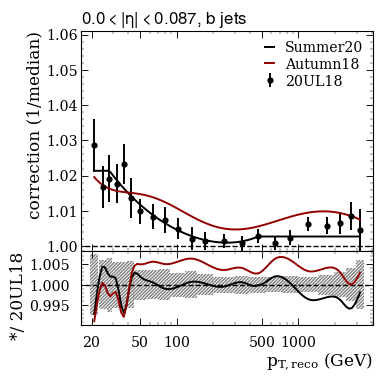

Plotting subsample:  b
Eta:  1
Saving plot for eta =  eta0p087to0p174
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18/corr_vs_pt_L5_20UL18Summer20-Autumn18_b_eta0p087to0p174.pdf / .png


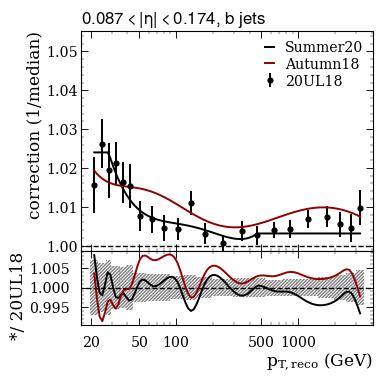

Plotting subsample:  b
Eta:  2
Saving plot for eta =  eta0p174to0p261
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18/corr_vs_pt_L5_20UL18Summer20-Autumn18_b_eta0p174to0p261.pdf / .png


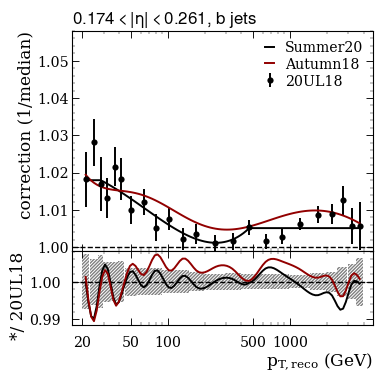

Plotting subsample:  b
Eta:  3
Saving plot for eta =  eta0p261to0p348
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18/corr_vs_pt_L5_20UL18Summer20-Autumn18_b_eta0p261to0p348.pdf / .png


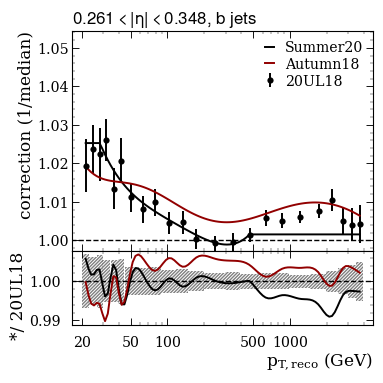

Plotting subsample:  b
Eta:  4
Saving plot for eta =  eta0p348to0p435
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18/corr_vs_pt_L5_20UL18Summer20-Autumn18_b_eta0p348to0p435.pdf / .png


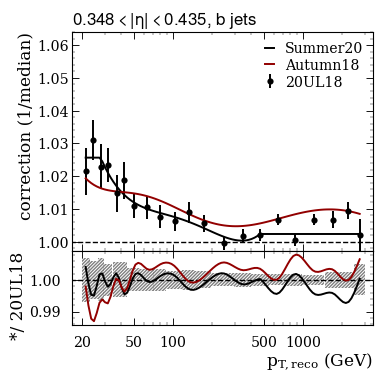

Plotting subsample:  b
Eta:  5
Saving plot for eta =  eta0p435to0p522
Saving plot with the name =  fig/corr_vs_pt_comparisons/corr_vs_pt_L5_20UL18Summer20-Autumn18/corr_vs_pt_L5_20UL18Summer20-Autumn18_b_eta0p435to0p522.pdf / .png


KeyboardInterrupt: 

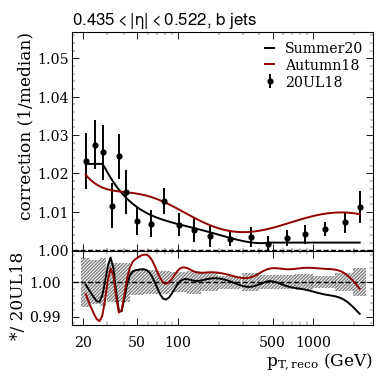

In [24]:
eta_binning  = "CaloTowers"  ### HCalPart, JERC, CoarseCalo, CaloTowers, onebin;
eta_binning_str = '_'+eta_binning if eta_binning != "HCalPart" else ''
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g']
flavors = ['b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'all']
# flavors = ['all']
# etabins = np.array(JERC_Constants.etaBinsEdges_Aut18_full())
# etabins = np.array(JERC_Constants.etaBinsEdges_CaloTowers_full())
# etabins_abs = etabins[(len(etabins)-1)//2:]

# flavors = ['ud', 'b']
# flavors = ['all']

# tag1 = '_L5_QCD-MG-Her'+eta_binning_str
tag2 = '_L5_QCD-Py'+eta_binning_str
# tag2 = '_L5_QCD-MG-Py'+eta_binning_str
# tag3 = '_L5_QCD-divided'

closure_corr = read_data2("Median", "all", tag2) #divide by Pythia

mean_name = "Median"
mean_name_std = mean_name+'Std'

closure_Aut18 = evaluator['Autumn18_V3_MC_Pythia8_all_L2Relative_AK4PFchs']
closure_Sum16 = evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']
etabins = JetEtaBins(eta_binning, absolute=True)
ptbins = PtBins("MC_truth")


for samp in flavors:
    samp_Aut18 = samp
#     samp_Sum20 = '_'+samp
    samp_Aut18 = '_ud' if samp_Aut18=='u' or samp_Aut18=='d' or samp_Aut18=='q' else '_'+samp_Aut18
    
    evo_Her = evaluator[f'Autumn18_V3_MC_Herwig7{samp_Aut18}_L2Relative_AK4PFchs']
    evo = evaluator[f'Autumn18_V3_MC_Pythia8{samp_Aut18}_L2Relative_AK4PFchs']
    if samp_Aut18=='_all':
        evo2 = evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']
    else:
        evo2 = evaluator[f'Summer16_07Aug2017_V15_Flavor_Pythia8_MC{samp_Aut18}_L5Flavor_AK4PFchs']
        
    if samp_Aut18!='_all':
        evo3 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5PFchs{samp_Aut18}J']
#         evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py-etaAut18{samp_Aut18}J']
        evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_standalonePyQCD{eta_binning_str}{samp_Aut18}J']
#         evo5 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{eta_binning_str}{samp_Aut18}J']
    else:
        evo3 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5PFchs_aJ']
        evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_standalonePyQCD{eta_binning_str}_aJ']
#         evo5 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{eta_binning_str}_aJ']
#         evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_aJ']
#     evo4 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5Calo{samp_Aut18}J']
#     evo4_Her = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{samp_Aut18}J']

    data = {
            "20UL18": read_data4plot(samp, tag2, closure_corr),
#             "20UL18, Her": read_data4plot(samp, tag1, closure_corr)
           }
    
    functions = {
#             "Summer20_Her":   [evo4_Her, None],
            "Summer20":    [evo4, None],    
#             "Summer20, Her":    [evo5, None],
            "Autumn18":    [evo, closure_Aut18],
#             "Winter14":       [evo3, None],
#             "Autumn18_Her":   [evo_Her, closure_Aut18],
            
           }
    
    for k in range(etabins.nbins):
#     for k in ptbins.get_bin_idx([20, 35, 150, 400]):
        print('Plotting subsample: ', samp)
        print('Eta: ', k)
        if not np.any(data[list(data.keys())[0]][2][:,k]>-0.1):
#             continue
#         if not np.any(median2[:,k]>-0.1):
            print("All median values are none")
            continue
        
        make_comparison_plot(data, 
                                  functions,
                                  etabins, ptbins,
                                  binidx=k, flav=samp, ratio_name='*/ 20UL18', plotvspt=True)
        
3;


In [ ]:
# eta_binning  = "CaloTowers"  ### HCalPart, JERC, CoarseCalo, CaloTowers, onebin;
# eta_binning_str = '_'+eta_binning if eta_binning != "HCalPart" else ''
# # load_fit_res=True
# # subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g']
# flavors = ['b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'all']
# # flavors = ['all']
# # etabins = np.array(JERC_Constants.etaBinsEdges_Aut18_full())
# # etabins = np.array(JERC_Constants.etaBinsEdges_CaloTowers_full())
# # etabins_abs = etabins[(len(etabins)-1)//2:]

# # flavors = ['ud', 'b']
# # flavors = ['all']

# # tag1 = '_L5_QCD-MG-Her'+eta_binning_str
# tag2 = '_L5_QCD-Py'+eta_binning_str
# # tag2 = '_L5_QCD-MG-Py'+eta_binning_str
# # tag3 = '_L5_QCD-divided'

# closure_corr = read_data2("Median", "all", tag2) #divide by Pythia

# mean_name = "Median"
# mean_name_std = mean_name+'Std'

# closure_Aut18 = evaluator['Autumn18_V3_MC_Pythia8_all_L2Relative_AK4PFchs']
# closure_Sum16 = evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']
# etabins = JetEtaBins(eta_binning, absolute=True)


# for samp in flavors:
#     samp_Aut18 = samp
# #     samp_Sum20 = '_'+samp
#     samp_Aut18 = '_ud' if samp_Aut18=='u' or samp_Aut18=='d' or samp_Aut18=='q' else '_'+samp_Aut18
    
#     evo_Her = evaluator[f'Autumn18_V3_MC_Herwig7{samp_Aut18}_L2Relative_AK4PFchs']
#     evo = evaluator[f'Autumn18_V3_MC_Pythia8{samp_Aut18}_L2Relative_AK4PFchs']
#     if samp_Aut18=='_all':
#         evo2 = evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']
#     else:
#         evo2 = evaluator[f'Summer16_07Aug2017_V15_Flavor_Pythia8_MC{samp_Aut18}_L5Flavor_AK4PFchs']
        
#     if samp_Aut18!='_all':
#         evo3 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5PFchs{samp_Aut18}J']
# #         evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Py-etaAut18{samp_Aut18}J']
#         evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_standalonePyQCD{eta_binning_str}{samp_Aut18}J']
# #         evo5 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{eta_binning_str}{samp_Aut18}J']
#     else:
#         evo3 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5PFchs_aJ']
#         evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_standalonePyQCD{eta_binning_str}_aJ']
# #         evo5 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{eta_binning_str}_aJ']
# #         evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_aJ']
# #     evo4 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5Calo{samp_Aut18}J']
# #     evo4_Her = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{samp_Aut18}J']

#     data = {
#             "20UL18": read_data4plot(samp, tag2, closure_corr),
# #             "20UL18, Her": read_data4plot(samp, tag1, closure_corr)
#            }
    
#     functions = {
# #             "Summer20_Her":   [evo4_Her, None],
#             "Summer20":    [evo4, None],    
# #             "Summer20, Her":    [evo5, None],
#             "Autumn18":    [evo, closure_Aut18],
# #             "Winter14":       [evo3, None],
# #             "Autumn18_Her":   [evo_Her, closure_Aut18],
            
#            }
    
#     for k in range(etabins.nbins):
#         print('Plotting subsample: ', samp)
#         print('Eta: ', k)
#         if not np.any(data[list(data.keys())[0]][2][:,k]>-0.1):
# #             continue
# #         if not np.any(median2[:,k]>-0.1):
#             print("All median values are none")
#             continue
        
#         make_comparison_plot(data, 
#                                   functions,
#                                   etabins, ptbins[:-1],
#                                   etaidx=k, flav=samp, ratio_name='*/ 20UL18')
        
# 3;


In [164]:
# flavors = ['b', 'c', 'd', 'u', 's', 'g', 'ud', 'q', 'all']
flavors = ['b', 'c', 'd', 's', 'g', 'ud', 'q', 'all']

/tmp/anpotreb/ipykernel_23154/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Figure saved: fig/corr_vs_pt/Pythia-TTBAR/corr_vs_pt_Pythia-TTBAR_b.pdf /.png


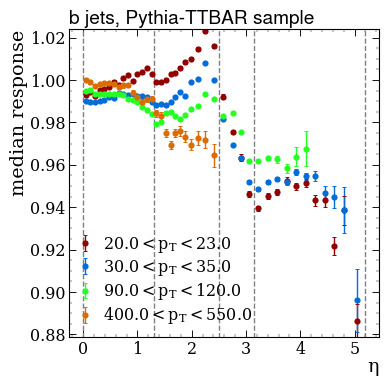

/tmp/anpotreb/ipykernel_23154/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Figure saved: fig/corr_vs_pt/Pythia-TTBAR/corr_vs_pt_Pythia-TTBAR_c.pdf /.png


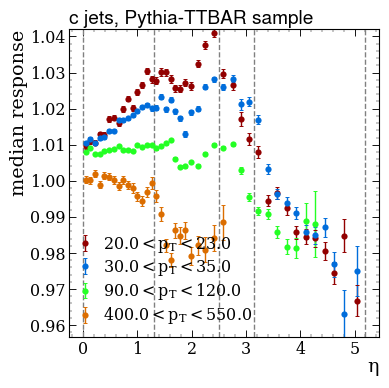

/tmp/anpotreb/ipykernel_23154/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Figure saved: fig/corr_vs_pt/Pythia-TTBAR/corr_vs_pt_Pythia-TTBAR_d.pdf /.png


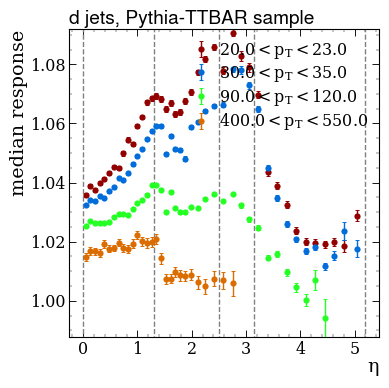

/tmp/anpotreb/ipykernel_23154/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Figure saved: fig/corr_vs_pt/Pythia-TTBAR/corr_vs_pt_Pythia-TTBAR_s.pdf /.png


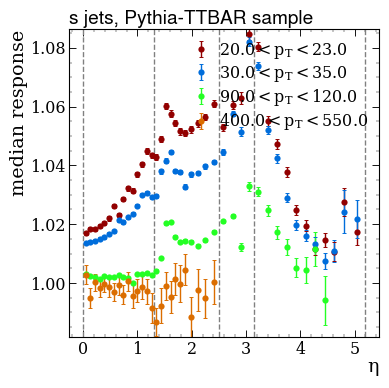

/tmp/anpotreb/ipykernel_23154/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


Figure saved: fig/corr_vs_pt/Pythia-TTBAR/corr_vs_pt_Pythia-TTBAR_g.pdf /.png


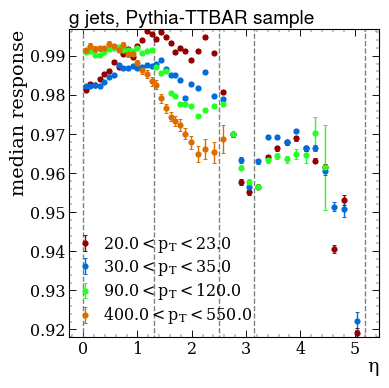

/tmp/anpotreb/ipykernel_23154/3336818717.py:6: RuntimeWarning: divide by zero encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]
/tmp/anpotreb/ipykernel_23154/3336818717.py:6: RuntimeWarning: invalid value encountered in true_divide
  median = read_data(mean_name, flav, tag, path)/closure #[2:]


ValueError: Axis limits cannot be NaN or Inf

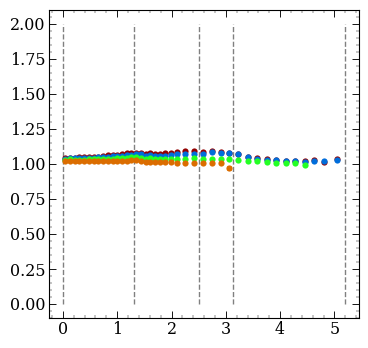

In [166]:
eta_binning = "CaloTowers"  ### HCalPart, JERC, CoarseCalo, CaloTowers, onebin;
eta_binning_str = '_'+eta_binning if eta_binning != "HCalPart" else ''
# from plotters import plot_corrections_eta
tag1 = '_L5_Pythia-TTBAR'+eta_binning_str
tag2 = '_L5_QCD-Py'+eta_binning_str

etabins = JetEtaBins(eta_binning, absolute=True)
pt_bins = PtBins("MC_truth")
closure_corr = read_data2("Median", "all", tag2)
for flav in flavors:
    data = read_data4plot(flav, tag1, closure_corr)[:2]
    plot_corrections_eta(data[0], data[1], pt_bins, etabins.centres, tag1[:-1*len(eta_binning)-1], flav, plotptvals=[20, 30, 100, 400])

In [ ]:
# load_fit_res=True
# subsamples = ['all', 'b', 'c', 'd', 'u', 's', 'g']
# subsamples = ['b', 'c', 'd', 'u', 's', 'g']

subsamples = ['ud', 'b']
# subsamples = ['all']


tag1 = '_L5_Herwig-QCD-etaAut18'
tag2 = '_L5_QCD-JME-etaAut18'
# tag3 = '_L5_QCD-divided'

closure_corr = read_data("Median", "all", tag2)
# closure_corr = read_data("Median", "all", tag2)

# df_csv = pd.read_csv('out_txt/Closure_L5_QCD_Pythia.coffea').set_index('etaBins')
# closure_corr = df_csv.to_numpy().transpose()

mean_name = "Median"
mean_name_std = mean_name+'Std'

closure_Aut18 = evaluator['Autumn18_V3_MC_Herwig7_all_L2Relative_AK4PFchs']


# closure_Sum16 = evaluator['Summer16_07Aug2017_V15_Flavor_Herwig7_MC_L2Relative_AK4PFchs']


for samp in subsamples:
    samp_Aut18 = samp
#     samp_Sum20 = '_'+samp
    samp_Aut18 = '_ud' if samp_Aut18=='u' or samp_Aut18=='d' else '_'+samp_Aut18
#     samp_Sum20 = '_q' if samp_Aut18=='_ud' else '_'+samp
#     samp_Sum16 = '' if samp_Aut18=='_all' else samp_Aut18

    median1 = read_data(mean_name, samp, tag1) #[2:]
    medianstd1 = read_data(mean_name_std, samp, tag1)
    reco_pt = read_data("MeanRecoPt", samp, tag1)

    median2 = read_data(mean_name, samp, tag2) #[2:]
    medianstd2 = read_data(mean_name_std, samp, tag2)
    evo = evaluator[f'Autumn18_V3_MC_Herwig7{samp_Aut18}_L2Relative_AK4PFchs']
#     if samp_Aut18=='_all':
#         evo2 = evaluator['Summer16_07Aug2017_V15_Flavor_Pythia8_MC_L2Relative_AK4PFchs']
#     else:
#         evo2 = evaluator[f'Summer16_07Aug2017_V15_Flavor_Pythia8_MC{samp_Aut18}_L5Flavor_AK4PFchs']
        
    evo3 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5Calo{samp_Aut18}J']
#     evo4 = evaluator[f'Winter14_V8_MC_L5Flavor_AK5Calo{samp_Aut18}J']
    evo4 = evaluator[f'Summer20UL18_V2_MC_L5Flavor_AK4PFchs_Her{samp_Aut18}J']

    data = {
#             "No_closure": [median2, medianstd2, reco_pt],
            "Her7": [median1/closure_corr, medianstd1, reco_pt],
            "Py8": [median2/closure_corr, medianstd2, reco_pt],
           }
    
    functions = {
            "Autumn18_He": [evo, closure_Aut18],
            "Winter14":       [evo3, None],
            "Summer20_He":       [evo4, None],
           }
    
    for k in range(len(etabins_abs)-1):
#     for k in [9]:
        print('Plotting subsample: ', samp)
        print('Eta: ', k)
        if not np.any(median2[:,k]>-0.1):
            print("All median values are none")
            continue
#         median_4 = read_data("Median", samp, '_L5_LHEflav1_Herwig-TTBAR-JME-noLepIso')
#         medianstd_4 = read_data("MedianStd", samp, '_L5_LHEflav1_Herwig-TTBAR-JME-noLepIso')
        
#         make_comparison_plot_many(data,
#                               correction_fncs = np.array([None]), closures=[], k=0, samp='',
#                                name_base='', names=[], ratio_name='ratio'):
        
        make_comparison_plot(data, 
                                  functions,
                                  etaidx=k, samp=samp, ratio_name='*/ \n Herwig')
        
3;


### Double ration plots (for flavour vs antiflavour) responses

In [ ]:
# load_fit_res=True
flavors = ['b', 'c', 's', 'u', 'd']

k2 = np.where(etabins_abs<=0)[0][-1]
k4 = np.where(etabins_abs<=1.3)[0][-1]
k6 = np.where(etabins_abs<=2.5)[0][-1]
k8 = np.where(etabins_abs<=3.0)[0][-1]
ks = [k2, k4, k6, k8]

# ks = [k2, k4] #, k6, k8]
for flav in flavors:
    for k in ks:
        print('Fitting subsample: ', flav)
        print('Eta: ', k)        
        
        make_double_ratio_plot('_L5_LHEflav1_TTBAR-JME-100files', '_L5_LHEflav1_Herwig-TTBAR-JME-100files',
                                   etaidx=k, samp=flav,
                                   ratio_name='Jet response ratio, $\overline{'+flav+'}/'+flav+'$')
                
3;

In [ ]:
# # load_fit_res=True
# subsamples = ['_b', '_c', '_s', '_ud']
# # subsamples = ['_g']

# k2 = np.where(etabins_abs<=0)[0][-1]
# k4 = np.where(etabins_abs<=1.3)[0][-1]
# k6 = np.where(etabins_abs<=2.5)[0][-1]
# k8 = np.where(etabins_abs<=3.0)[0][-1]
# ks = [k2, k4, k6, k8]

# # ks = [k2, k4] #, k6, k8]
# for samp in subsamples:
#     for k in ks:
#         print('Fitting subsample: ', samp)
#         print('Eta: ', k)        
        
#         make_double_ratio_plot('_L5_LHEflav1_TTBAR-JME', '_L5_LHEflav1_Herwig-TTBAR-JME',
#                                    k=k, samp=samp,
#                                    ratio_name=f'{samp[1:]}bar /\n {samp[1:]}')
                
# 3;